In [1]:
import numpy as np
from scipy.stats import multivariate_normal as norm
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Set up Data

In [2]:
mix = pd.read_csv("/home/techfield/Downloads/gmm.csv", names=['x','y'])

# Gausian Mixture Model

In [15]:
class GMM:
    
    def __init__(self,X,K):
        self.X=X
        self.K=K
        self.N, self.D = X.shape
        
        
    def Gaussian(self):
        #KxN    done
        self.gaussian = np.array([ norm.pdf(self.X, mean = self.m[k,:], cov = self.sigma[k,:,:]) for k in range(self.K) ])
        
    def responsibility(self):
        #KxN    done
        self.resp = (self.pi * self.gaussian) / (self.pi * self.gaussian).sum(axis=0, keepdims=True)
    
    def mean(self):
        #KxD     done
        self.m = (self.resp @ self.X)/np.sum(self.resp, axis = 1, keepdims = True)
    
    def pii(self):
        #Kx1     done
        self.pi = self.resp.sum(axis = 1, keepdims = True) / self.N
        
    def cov(self):
        #KxDxD   done
        d = self.X - self.m.reshape([self.K,1,self.D])
        self.sigma = (self.resp[:,:,None] * d).transpose(0,2,1) @ d
        self.sigma /= self.resp[:,:,None,None].sum(axis = 1)
        self.sigma += 1e-8 * np.eye(self.D)
        
    def fit(self, epochs = 100):
        
#         self.m = self.X[np.random.choice(self.X.shape[0], self.K, replace=False), :]
        self.m = np.random.randn(self.K,self.D)
        self.pi = np.random.randn(self.K,1)
        self.sigma = np.random.randn(self.K,self.D,self.D)
        self.sigma = (self.sigma.transpose(0,2,1) @ self.sigma) / 2
#         self.sigma += 1e-8 * np.eye(self.D)
        self.counter = 0
        
        for epoch in range(epochs):
            self.Gaussian()
            self.responsibility()
            self.mean()
            self.cov()
            self.pii()
            self.counter += 1

# Run model

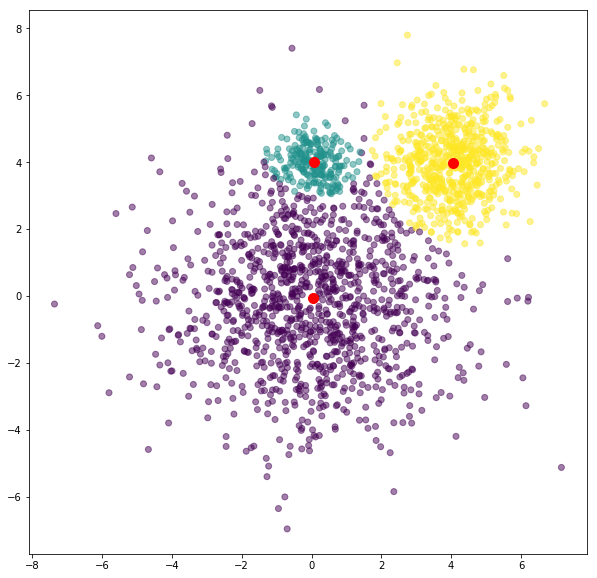

In [24]:
gmm = GMM(mix.values,3)
gmm.fit(epochs=100)
y = gmm.resp.argmax(axis=0)

fig,ax = plt.subplots(figsize=(10,10))
ax.scatter(mix.x, mix.y, alpha=.5, c=y)
ax.scatter(gmm.m[:,0], gmm.m[:,1], s=100, c="r")

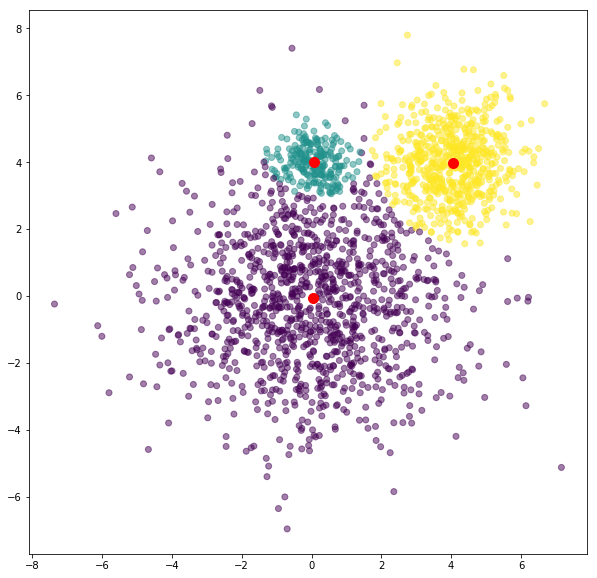

In [23]:
gmm1 = GMM(mix.values,3)
gmm1.fit(epochs=100)
y1 = gmm1.resp.argmax(axis=0)

fig,ax = plt.subplots(figsize=(10,10))
ax.scatter(mix.x, mix.y, alpha=.5, c=y1)
ax.scatter(gmm1.m[:,0], gmm1.m[:,1], s=100, c="r")